### Cust_Spend_Data.csv 파일을 통해서 고객의 의류소비, 음료소비, 음식소비 대이터를 통해서 비슷한 고객으로 그루핑 하자

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('../data/Cust_Spend_Data.csv')

In [4]:
df.head(3)

,Cust_ID,Name,Avg_Mthly_Spend,No_Of_Visits,Apparel_Items,FnV_Items,Staples_Items
0,1,A,10000,2,1,1,0
1,2,B,7000,3,0,10,9
2,3,C,7000,7,1,3,4


In [5]:
df.isna().sum()

Cust_ID            0
Name               0
Avg_Mthly_Spend    0
No_Of_Visits       0
Apparel_Items      0
FnV_Items          0
Staples_Items      0
dtype: int64

In [6]:
X = df.loc[:, 'Apparel_Items': ]

In [9]:
X.head(3)

,Apparel_Items,FnV_Items,Staples_Items
0,1,1,0
1,0,10,9
2,1,3,4


In [13]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

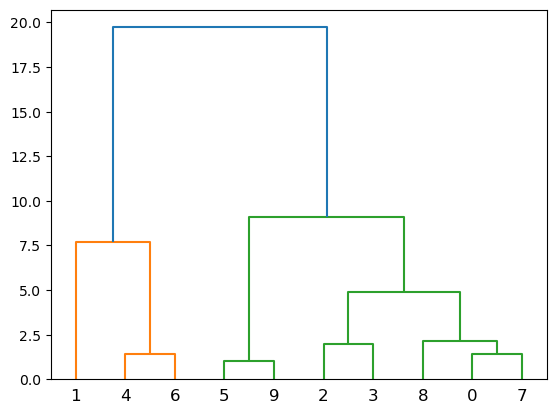

In [14]:
sch.dendrogram( sch.linkage(X, method='ward') )
plt.show()

In [15]:
from sklearn.cluster import AgglomerativeClustering

In [17]:
hc = AgglomerativeClustering(n_clusters=2)

In [18]:
y_pred = hc.fit_predict(X)

In [19]:
df['Group'] = y_pred

In [20]:
df.loc[df['Group'] == 4, ].shape

(0, 8)